Download the “Monatszahlen Verkehrsunfälle” Dataset from the München Open Data Portal. Here you see the number of accidents for specific categories per month. Important are the first 5 columns:

1. Category
2. Accident-type (insgesamt means total for all subcategories)
3. Year
4. Month
5. Value


Your goal would be to visualise historically the number of accidents per category (column1). 

The dataset currently contains values until the end of 2020. 

Create an application that forecasts the values for:

Category: 'Alkoholunfälle'

Type: 'insgesamt

Year: '2021'

Month: '01'


In [36]:
%config Completer.use_jedi = False

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv("./dataset.csv")
df.shape

(1995, 5)

In [39]:
df.head(30)

,Category,Accident_Type,YEAR,MONTH,VALUE
0,ALK,INS,2021,202101,NaN
1,ALK,INS,2021,202102,NaN
2,ALK,INS,2021,202103,NaN
3,ALK,INS,2021,202104,NaN
4,ALK,INS,2021,202105,NaN
5,ALK,INS,2021,202106,NaN
6,ALK,INS,2021,202107,NaN
7,ALK,INS,2021,202108,NaN
8,ALK,INS,2021,202109,NaN
9,ALK,INS,2021,202110,NaN


In [40]:
df.rename(columns={'MONATSZAHL': 'Category', 'AUSPRAEGUNG': 'Accident_Type', 'JAHR':'YEAR', 'MONAT':'MONTH',
                   'WERT':'VALUE'}, inplace=True)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       1995 non-null   object 
 1   Accident_Type  1995 non-null   object 
 2   YEAR           1995 non-null   int64  
 3   MONTH          1995 non-null   object 
 4   VALUE          1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


In [42]:
df1=df[['Category','Accident_Type','YEAR','MONTH','VALUE']]
df1.shape

df1.to_csv('dataset.csv', index=False)

In [43]:
df_yearly_sum = df1[df1['MONTH']=='Summe']
df_yearly_ts = df1[df1['MONTH']!='Summe']


In [44]:
df_yearly_sum.shape, df_yearly_ts.shape, df.shape

((0, 5), (1995, 5), (1995, 5))

In [45]:
df.Category.unique()

array(['ALK', 'FLU', 'VERK'], dtype=object)

In [46]:
df.Accident_Type.unique()

array(['INS', 'VUG', 'MIT'], dtype=object)

In [21]:
df_yearly_sum.groupby(['Category','Accident_Type','YEAR'])['VALUE'].agg(np.sum).reset_index()

,Category,Accident_Type,YEAR,VALUE
0,Alkoholunfälle,Verletzte und Getötete,2000,376.0
1,Alkoholunfälle,Verletzte und Getötete,2001,391.0
2,Alkoholunfälle,Verletzte und Getötete,2002,379.0
3,Alkoholunfälle,Verletzte und Getötete,2003,319.0
4,Alkoholunfälle,Verletzte und Getötete,2004,304.0
...,...,...,...,...
142,Verkehrsunfälle,mit Personenschäden,2016,5329.0
143,Verkehrsunfälle,mit Personenschäden,2017,5062.0
144,Verkehrsunfälle,mit Personenschäden,2018,5471.0
145,Verkehrsunfälle,mit Personenschäden,2019,5313.0


In [11]:
df_yearly_sum

,Category,Accident_Type,YEAR,MONTH,VALUE
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
25,Alkoholunfälle,insgesamt,2019,Summe,434.0
38,Alkoholunfälle,insgesamt,2018,Summe,398.0
51,Alkoholunfälle,insgesamt,2017,Summe,409.0
64,Alkoholunfälle,insgesamt,2016,Summe,301.0
...,...,...,...,...,...
1930,Verkehrsunfälle,Verletzte und Getötete,2004,Summe,6219.0
1943,Verkehrsunfälle,Verletzte und Getötete,2003,Summe,6365.0
1956,Verkehrsunfälle,Verletzte und Getötete,2002,Summe,7026.0
1969,Verkehrsunfälle,Verletzte und Getötete,2001,Summe,7452.0


In [12]:
df_yearly_sum.Category.unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [13]:
Alkoholunfälle_df = df_yearly_sum[df_yearly_sum.Category=='Alkoholunfälle']
Alkoholunfälle_df.shape

(42, 5)

In [14]:
%matplotlib inline

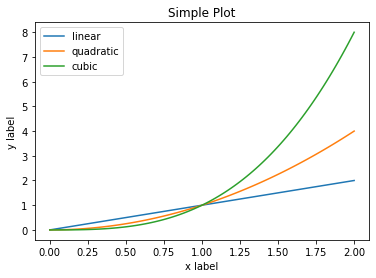

In [15]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [18]:
df[df.MONTH!='Summe'].shape

(1848, 9)

In [50]:
df_yearly_sum.Category.unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [25]:
df_yearly_sum.Accident_Type.unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [53]:
insgesamt_df = Alkoholunfälle_df[Alkoholunfälle_df.Accident_Type=='insgesamt']
insgesamt_df.shape

(21, 5)

In [54]:
insgesamt_df

,Category,Accident_Type,YEAR,MONTH,VALUE
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
25,Alkoholunfälle,insgesamt,2019,Summe,434.0
38,Alkoholunfälle,insgesamt,2018,Summe,398.0
51,Alkoholunfälle,insgesamt,2017,Summe,409.0
64,Alkoholunfälle,insgesamt,2016,Summe,301.0
77,Alkoholunfälle,insgesamt,2015,Summe,411.0
90,Alkoholunfälle,insgesamt,2014,Summe,382.0
103,Alkoholunfälle,insgesamt,2013,Summe,377.0
116,Alkoholunfälle,insgesamt,2012,Summe,440.0
129,Alkoholunfälle,insgesamt,2011,Summe,397.0


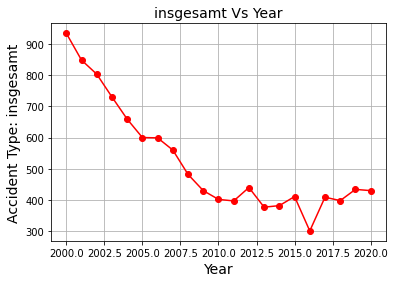

In [55]:
plt.plot(insgesamt_df['YEAR'], insgesamt_df['VALUE'], color='red', marker='o')
plt.title('insgesamt Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Accident Type: insgesamt', fontsize=14)
plt.grid(True)
plt.show()

In [43]:
verletzte_df = df_yearly_sum[df_yearly_sum.Accident_Type=='Verletzte und Getötete']
verletzte_df.shape

(63, 5)

No handles with labels found to put in legend.


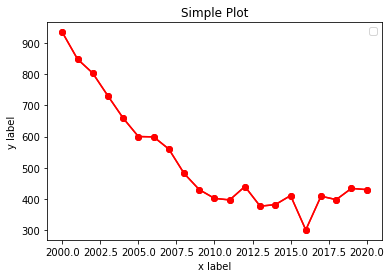

In [56]:
fig,ax =plt.subplots()
ax.plot(insgesamt_df['YEAR'], insgesamt_df['VALUE'], color='red', marker='o')
ax.plot(insgesamt_df['YEAR'], insgesamt_df['VALUE'], color='red', marker='o')
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.